In [1]:
# Dependencies
import time
import json
import requests
from scipy.stats import linregress
from matplotlib import pyplot as plt
from scipy.stats import stats
from sklearn import datasets
import pandas as pd
import numpy as np
from csv import writer
from csv import reader

%matplotlib inline

In [2]:
# read from Daniel Jackson's csv
csv = pd.read_csv("../Daniel Jackson's Work/Stock_outputs.csv")
df = pd.DataFrame(csv)
df.head()

# convert NaN to zero values
df = df.replace(np.nan,0)
df=df[df['Quarter']!=0]

# map formatting
# df["Revenue($mm)"] = df["Revenue($mm)"].map("${:,.2f}".format)
# df["EBIT($mm)"] = df["EBIT($mm)"].map("${:,.2f}".format)
# df["Debt($mm)"] = df["Debt($mm)"].map("${:,.2f}".format)
# df["Dividend Payout($mm)"] = df["Dividend Payout($mm)"].map("${:,.2f}".format)
# df["Operating Margin (%)"] = df["Operating Margin (%)"].map("{:,.2f} %".format)
# df["Payout (% of EBIT)"] = df["Payout (% of EBIT)"].map("{:,.2f} %".format)

df.head()

,Unnamed: 0,Symbol,Name,Exchange,Quarter,Revenue($mm),EBIT($mm),Debt($mm),Dividend Payout($mm),Operating Margin (%),Leverage (Debt/EBIT),Payout (% of EBIT)
0,0,APA,Apache Corp,S&P500,2020-06-30,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1,1,BKR,Baker Hughes,S&P500,2020-06-30,4736.0,32.0,6766.0,-118.0,0.68,52.86,368.75
2,2,COG,Cabot Oil & Gas Corp,S&P500,2020-06-30,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,3,COP,Conocophillips,S&P500,2020-06-30,2749.0,1381.0,14852.0,-455.0,50.24,2.69,32.95
4,4,CVX,Chevron Corp,S&P500,2020-06-30,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [3]:
# groupby max values
quarter_div = df[['Quarter', 'Dividend Payout($mm)']].groupby('Quarter').mean()['Dividend Payout($mm)']
quarter_op = df[['Quarter', 'Operating Margin (%)']].groupby('Quarter').mean()['Operating Margin (%)']
quarter_lev = df[['Quarter', 'Leverage (Debt/EBIT)']].groupby('Quarter').mean()['Leverage (Debt/EBIT)']
quarter_ebit = df[['Quarter', 'Payout (% of EBIT)']].groupby('Quarter').mean()['Payout (% of EBIT)']


quarterly_dict = {
    'Average Quarterly Dividend Payout': quarter_div,
    'Average Quarterly Operating Margin (%)': quarter_op,
    'Average Quarterly Leverage Ratio': quarter_lev,
    'Average Quarterly EBIT': quarter_ebit
}
quarterly_data = pd.DataFrame(quarterly_dict)
quarterly_data.head()

,Average Quarterly Dividend Payout,Average Quarterly Operating Margin (%),Average Quarterly Leverage Ratio,Average Quarterly EBIT
Quarter,,,,
2017-12-31,-135.3912,268.38600,0.24160,5.05280
2018-01-31,0.0000,-3388.89000,0.00000,0.00000
2018-03-31,-250.1240,14.71150,-0.40525,19.63125
2018-04-30,0.0000,-1495.45000,0.00000,0.00000
2018-06-30,-260.6755,9.57575,4.57525,24.65375


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

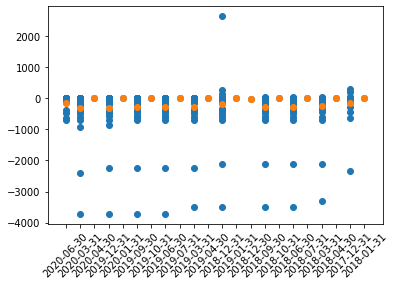

In [29]:
# dividend payout per quarter visualization
x_values = df['Quarter']
y_values = df['Dividend Payout($mm)']
plt.scatter(x_values, y_values)

# average dividend payout over visualization
x_values = quarterly_data['Quarter']
y_values = quarterly_data['Average Quarterly Dividend Payout']
plt.scatter(x_values, y_values)
plt.xticks(rotation=45)



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

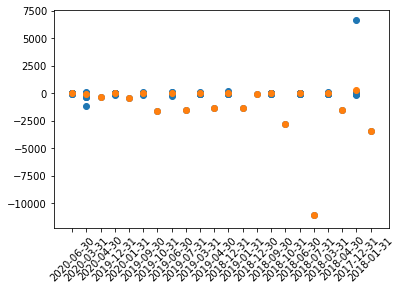

In [30]:
# operating margin per quarter visualization
x_values = df['Quarter']
y_values = df['Operating Margin (%)']
plt.scatter(x_values, y_values)

# average operating margin per quarter visualization
x_values = quarterly_data['Quarter']
y_values = quarterly_data['Average Quarterly Operating Margin (%)']
plt.scatter(x_values, y_values)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

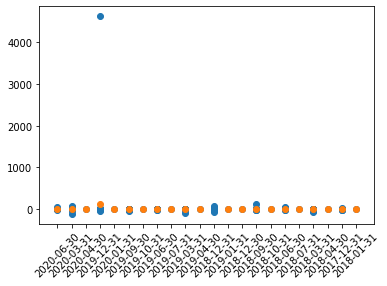

In [31]:
# leverage per quarter visualization
x_values = df['Quarter']
y_values = df['Leverage (Debt/EBIT)']
plt.scatter(x_values, y_values)

# average leverage per quarter visualization
x_values = quarterly_data['Quarter']
y_values = quarterly_data['Average Quarterly Leverage Ratio']
plt.scatter(x_values, y_values)

# formatting
plt.xticks(rotation=45)
plt.xlabel("Quarterly Periods ()")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

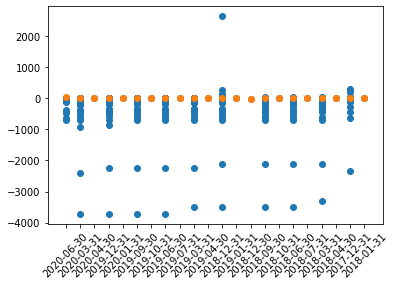

In [33]:
# EBIT payout per quarter visualization
x_values = df['Quarter']
y_values = df['Dividend Payout($mm)']
plt.scatter(x_values, y_values)

# average EBIT payout per quarter visualization
x_values = quarterly_data['Quarter']
y_values = quarterly_data['Average Quarterly EBIT']
plt.scatter(x_values, y_values)
plt.xticks(rotation=45)

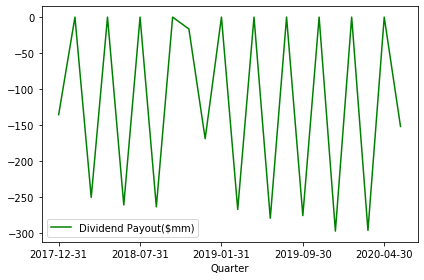

In [35]:
# average dividend payout over time visualization
average_quarterly_dividend_payout=pd.DataFrame(quarterly_dict['Average Quarterly Dividend Payout'])
average_quarterly_dividend_payout.plot(kind='line',color='g')
plt.tight_layout()

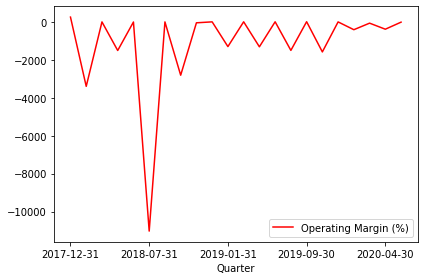

In [8]:
# average operating margin over time visualization
average_quarterly_operating_margin=pd.DataFrame(quarterly_dict['Average Quarterly Operating Margin (%)'])
average_quarterly_operating_margin.plot(kind='line',color='r')
plt.tight_layout()

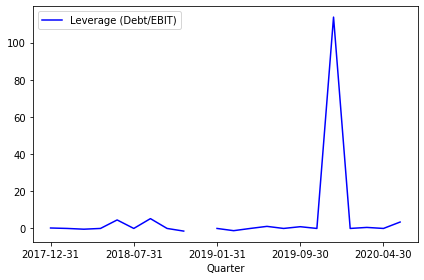

In [9]:
# average leverage over time visualization
average_quarterly_leverage=pd.DataFrame(quarterly_dict['Average Quarterly Leverage Ratio'])
average_quarterly_leverage.plot(kind='line',color='b')
plt.tight_layout()

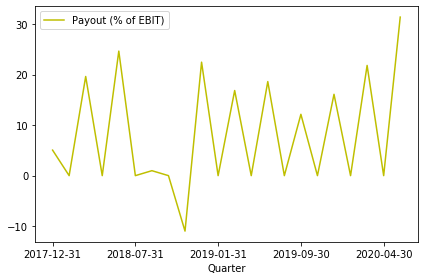

In [10]:
# average EBIT over time visualization
average_quarterly_ebit=pd.DataFrame(quarterly_dict['Average Quarterly EBIT'])
average_quarterly_ebit.plot(kind='line',color='y')
plt.tight_layout()

In [ ]:
# div = df["Dividend Payout($mm)"]
# new_div = div.dropna()

# variance = np.var(new_div)
# print(f"The variance using the NumPy module is {variance}")

# sd_numpy = np.std(new_div,ddof = 0)
# print(f"The standard deviation using the NumPy module is {sd_numpy}")

# mean_numpy = np.mean(new_div)

# print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
# print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
# print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")